#### The dataset contains the customers' churn information 
#### It contains customer demographic information , contract, device information, payment methods, monthly charges, internet services, streaming service 
* EDA of numeric 
* Categorical data analysis plot
* Decision tree to analyze customer profile who is likely to churn ( My DT models shows that contract type, tenure, internet service type, monthly charges are the important variables. Based on the result, company could design strategy for customer retention

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
Raw=pd.read_csv('~/TelcoCustomerChurn.csv')

In [4]:
Raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
Raw.shape

(7043, 21)

In [6]:
Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
Raw.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
for x in Raw.columns:
    print(Raw[x].value_counts())

1972-XMUWV    1
2839-RFSQE    1
9617-INGJY    1
8242-SOQUO    1
2050-ONYDQ    1
             ..
2087-QAREY    1
0621-JFHOL    1
4658-HCOHW    1
8039-ACLPL    1
8775-ERLNB    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [17]:
Raw['TotalCharges']=pd.to_numeric(Raw['TotalCharges'],errors='coerce')

In [23]:
Raw['TotalCharges'].isna().sum()

11

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'TotalCharge')

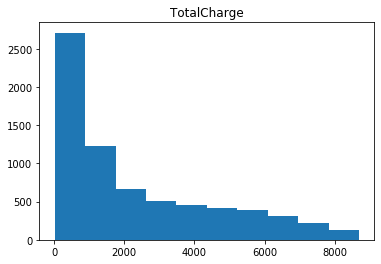

In [24]:
plt.hist(Raw['TotalCharges'],bins=10)
plt.title('TotalCharge')

In [27]:
Raw['TotalCharges'].median()

1397.475

In [28]:
Raw['TotalCharges']=Raw['TotalCharges'].fillna(Raw['TotalCharges'].median())

In [29]:
Raw['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

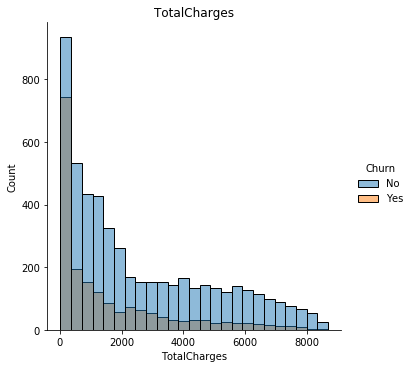

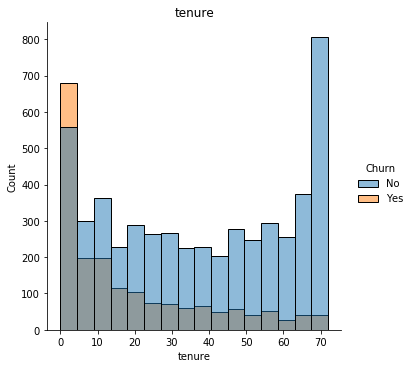

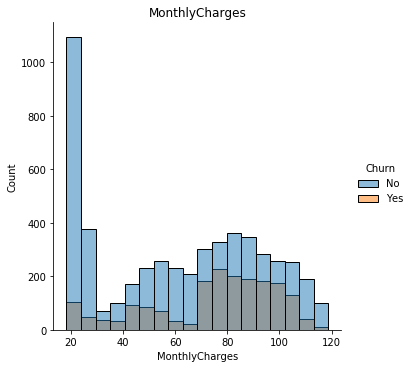

In [35]:
for x in ['TotalCharges','tenure','MonthlyCharges']:
    sns.displot(data=Raw,x=Raw[x],hue=Raw['Churn'])
    plt.title(x)

In [ ]:
sns.countplot(x='Contract',data=Raw,hue='Churn')

In [44]:
#categorical variable 
cat_var = [key for key in dict(Raw.dtypes)
             if dict(Raw.dtypes)[key] in ['object'] ] 

In [50]:
cat_var = [key for key in cat_var if key not in ('customerID','Churn')]

In [51]:
cat_var

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

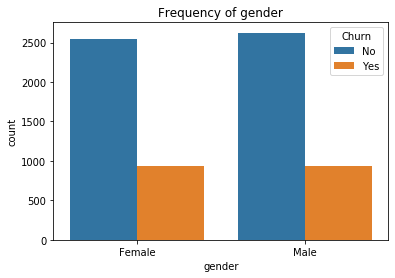

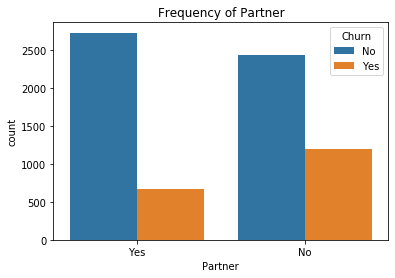

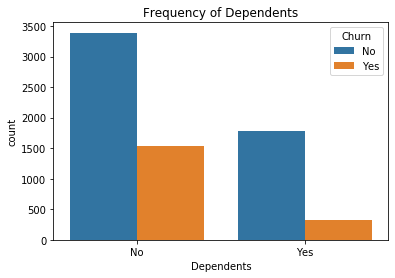

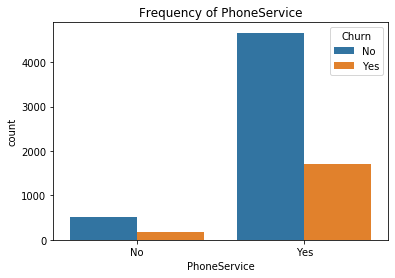

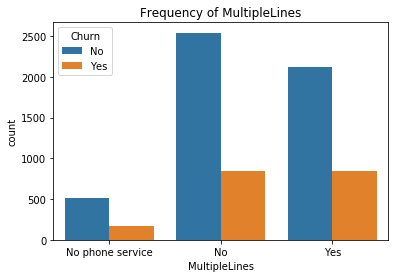

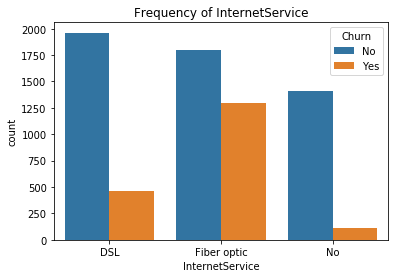

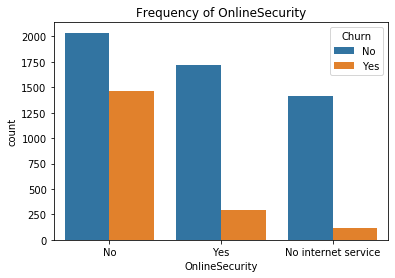

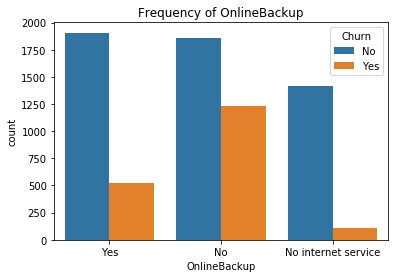

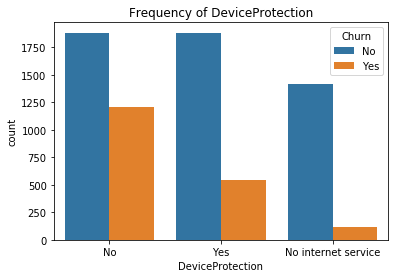

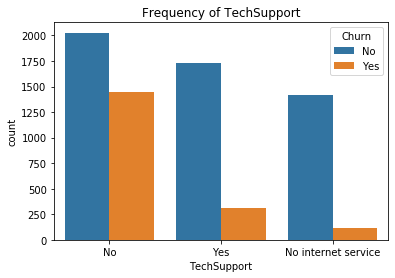

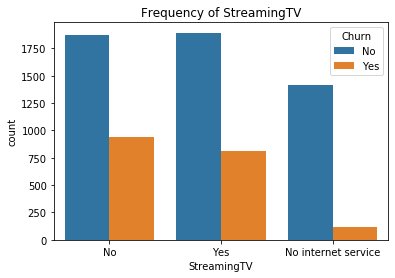

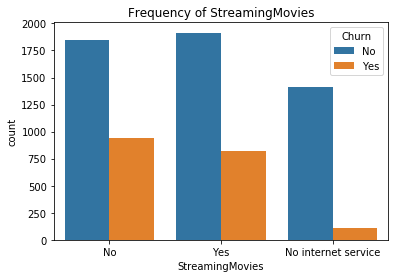

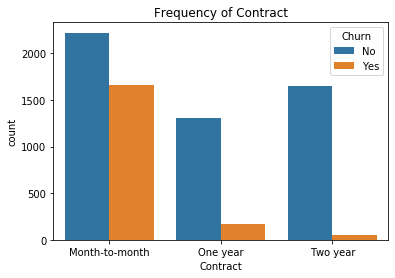

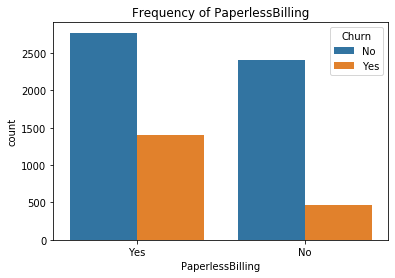

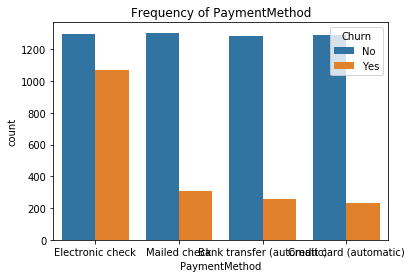

In [52]:
for x in cat_var:
    sns.countplot(data=Raw,x=x,hue='Churn')
    plt.title('Frequency of ' +x)
    plt.show()

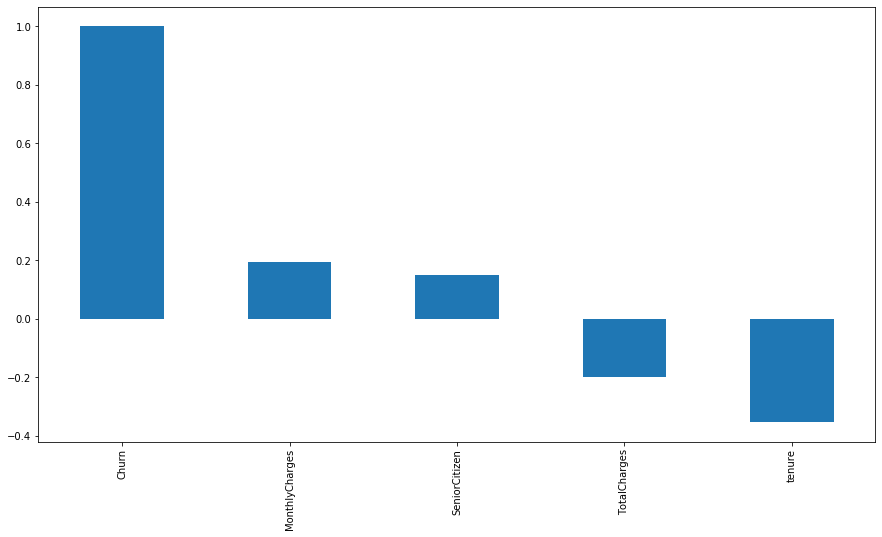

In [159]:
plt.figure(figsize=(15,8))
Raw.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# get dummy and convert Churn from Categorical to numeric

In [53]:
Raw['Churn'].replace(to_replace='Yes',value=1,inplace=True)
Raw['Churn'].replace(to_replace='No',value=0,inplace=True)

In [ ]:
Raw['Churn'].value_counts()

In [ ]:
Raw.loc[:,~Raw.columns.isin(['Churn','customerID'])]

In [69]:
dummies=pd.get_dummies(Raw,columns=cat_var)

In [72]:
dummies.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [97]:
x_train,x_test,y_train,y_test=train_test_split(dummies.loc[:,~dummies.columns.isin(['Churn','customerID'])],Raw['Churn'],test_size=0.2,random_state=123)

In [98]:
x_train.shape

(5634, 45)

In [99]:
x_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6924,0,1,69.35,69.35,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5249,0,72,67.20,4671.70,0,1,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
5852,1,21,69.10,1474.75,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3597,0,25,95.70,2338.35,0,1,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
4147,1,71,24.85,1901.00,0,1,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0


In [100]:
x_test.shape

(1409, 45)

In [101]:
y_train.shape

(5634,)

In [102]:
dtc=DecisionTreeClassifier()

In [103]:
params={'max_depth':np.arange(4,11,step=1),
        'criterion':['gini','entropy'],
        'max_leaf_nodes':np.arange(30,61,step=5),
        'min_samples_leaf':np.arange(50,301,step=25)
       }

In [106]:
GridSearch1=GridSearchCV(dtc,params,cv=5,return_train_score=True,scoring='roc_auc')

In [107]:
GridSearch1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [110]:
print('The best score is ' + str(GridSearch1.best_score_))
print('The best parameter is ' + str(GridSearch1.best_params_))

The best score is 0.8370040018505531
The best parameter is {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 35, 'min_samples_leaf': 75}


In [ ]:
pd.DataFrame(GridSearch1.cv_results_).sort_values(by=['mean_test_score'],ascending=False)

In [ ]:
# fit the model on whole dataset 

In [120]:
dtc_GS1=DecisionTreeClassifier(max_depth=6,max_leaf_nodes=35,min_samples_leaf=75,criterion='gini')

In [121]:
dtc_GS1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=35,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
dtc_GS1_pred=dtc_GS1.predict(x_train)

In [124]:
confusion_matrix(y_train,dtc_GS1_pred)

array([[3744,  415],
       [ 674,  801]])

In [125]:
accuracy_score(y_train,dtc_GS1_pred)

0.8067092651757188

In [141]:
dtc_GS1_testpred=dtc_GS1.predict(x_test)

In [142]:
accuracy_score(y_test,dtc_GS1_testpred)

0.7899219304471257

In [133]:
pd.DataFrame({'Variables':x_train.columns,'importance':dtc_GS1.feature_importances_}).sort_values(by=['importance'],ascending=False)[0:21]

,Variables,importance
36,Contract_Month-to-month,0.500076
1,tenure,0.180316
16,InternetService_Fiber optic,0.148855
2,MonthlyCharges,0.038891
3,TotalCharges,0.030967
27,TechSupport_No,0.028959
43,PaymentMethod_Electronic check,0.018916
38,Contract_Two year,0.011288
13,MultipleLines_No phone service,0.010568
14,MultipleLines_Yes,0.006162


In [134]:
 from sklearn import tree

[Text(1220.625, 1261.9285714285713, 'Contract_Month-to-month <= 0.5\ngini = 0.387\nsamples = 5634\nvalue = [4159, 1475]'),
 Text(571.9499999999999, 1067.7857142857142, 'MonthlyCharges <= 99.875\ngini = 0.124\nsamples = 2537\nvalue = [2369, 168]'),
 Text(306.9, 873.6428571428571, 'OnlineSecurity_No <= 0.5\ngini = 0.082\nsamples = 2080\nvalue = [1991, 89]'),
 Text(167.39999999999998, 679.5, 'PaymentMethod_Electronic check <= 0.5\ngini = 0.051\nsamples = 1600\nvalue = [1558, 42]'),
 Text(111.6, 485.3571428571429, 'MonthlyCharges <= 57.375\ngini = 0.04\nsamples = 1436\nvalue = [1407, 29]'),
 Text(55.8, 291.2142857142858, 'gini = 0.022\nsamples = 903\nvalue = [893, 10]'),
 Text(167.39999999999998, 291.2142857142858, 'gini = 0.069\nsamples = 533\nvalue = [514, 19]'),
 Text(223.2, 485.3571428571429, 'gini = 0.146\nsamples = 164\nvalue = [151, 13]'),
 Text(446.4, 679.5, 'TechSupport_No <= 0.5\ngini = 0.177\nsamples = 480\nvalue = [433, 47]'),
 Text(334.79999999999995, 485.3571428571429, 'tenur

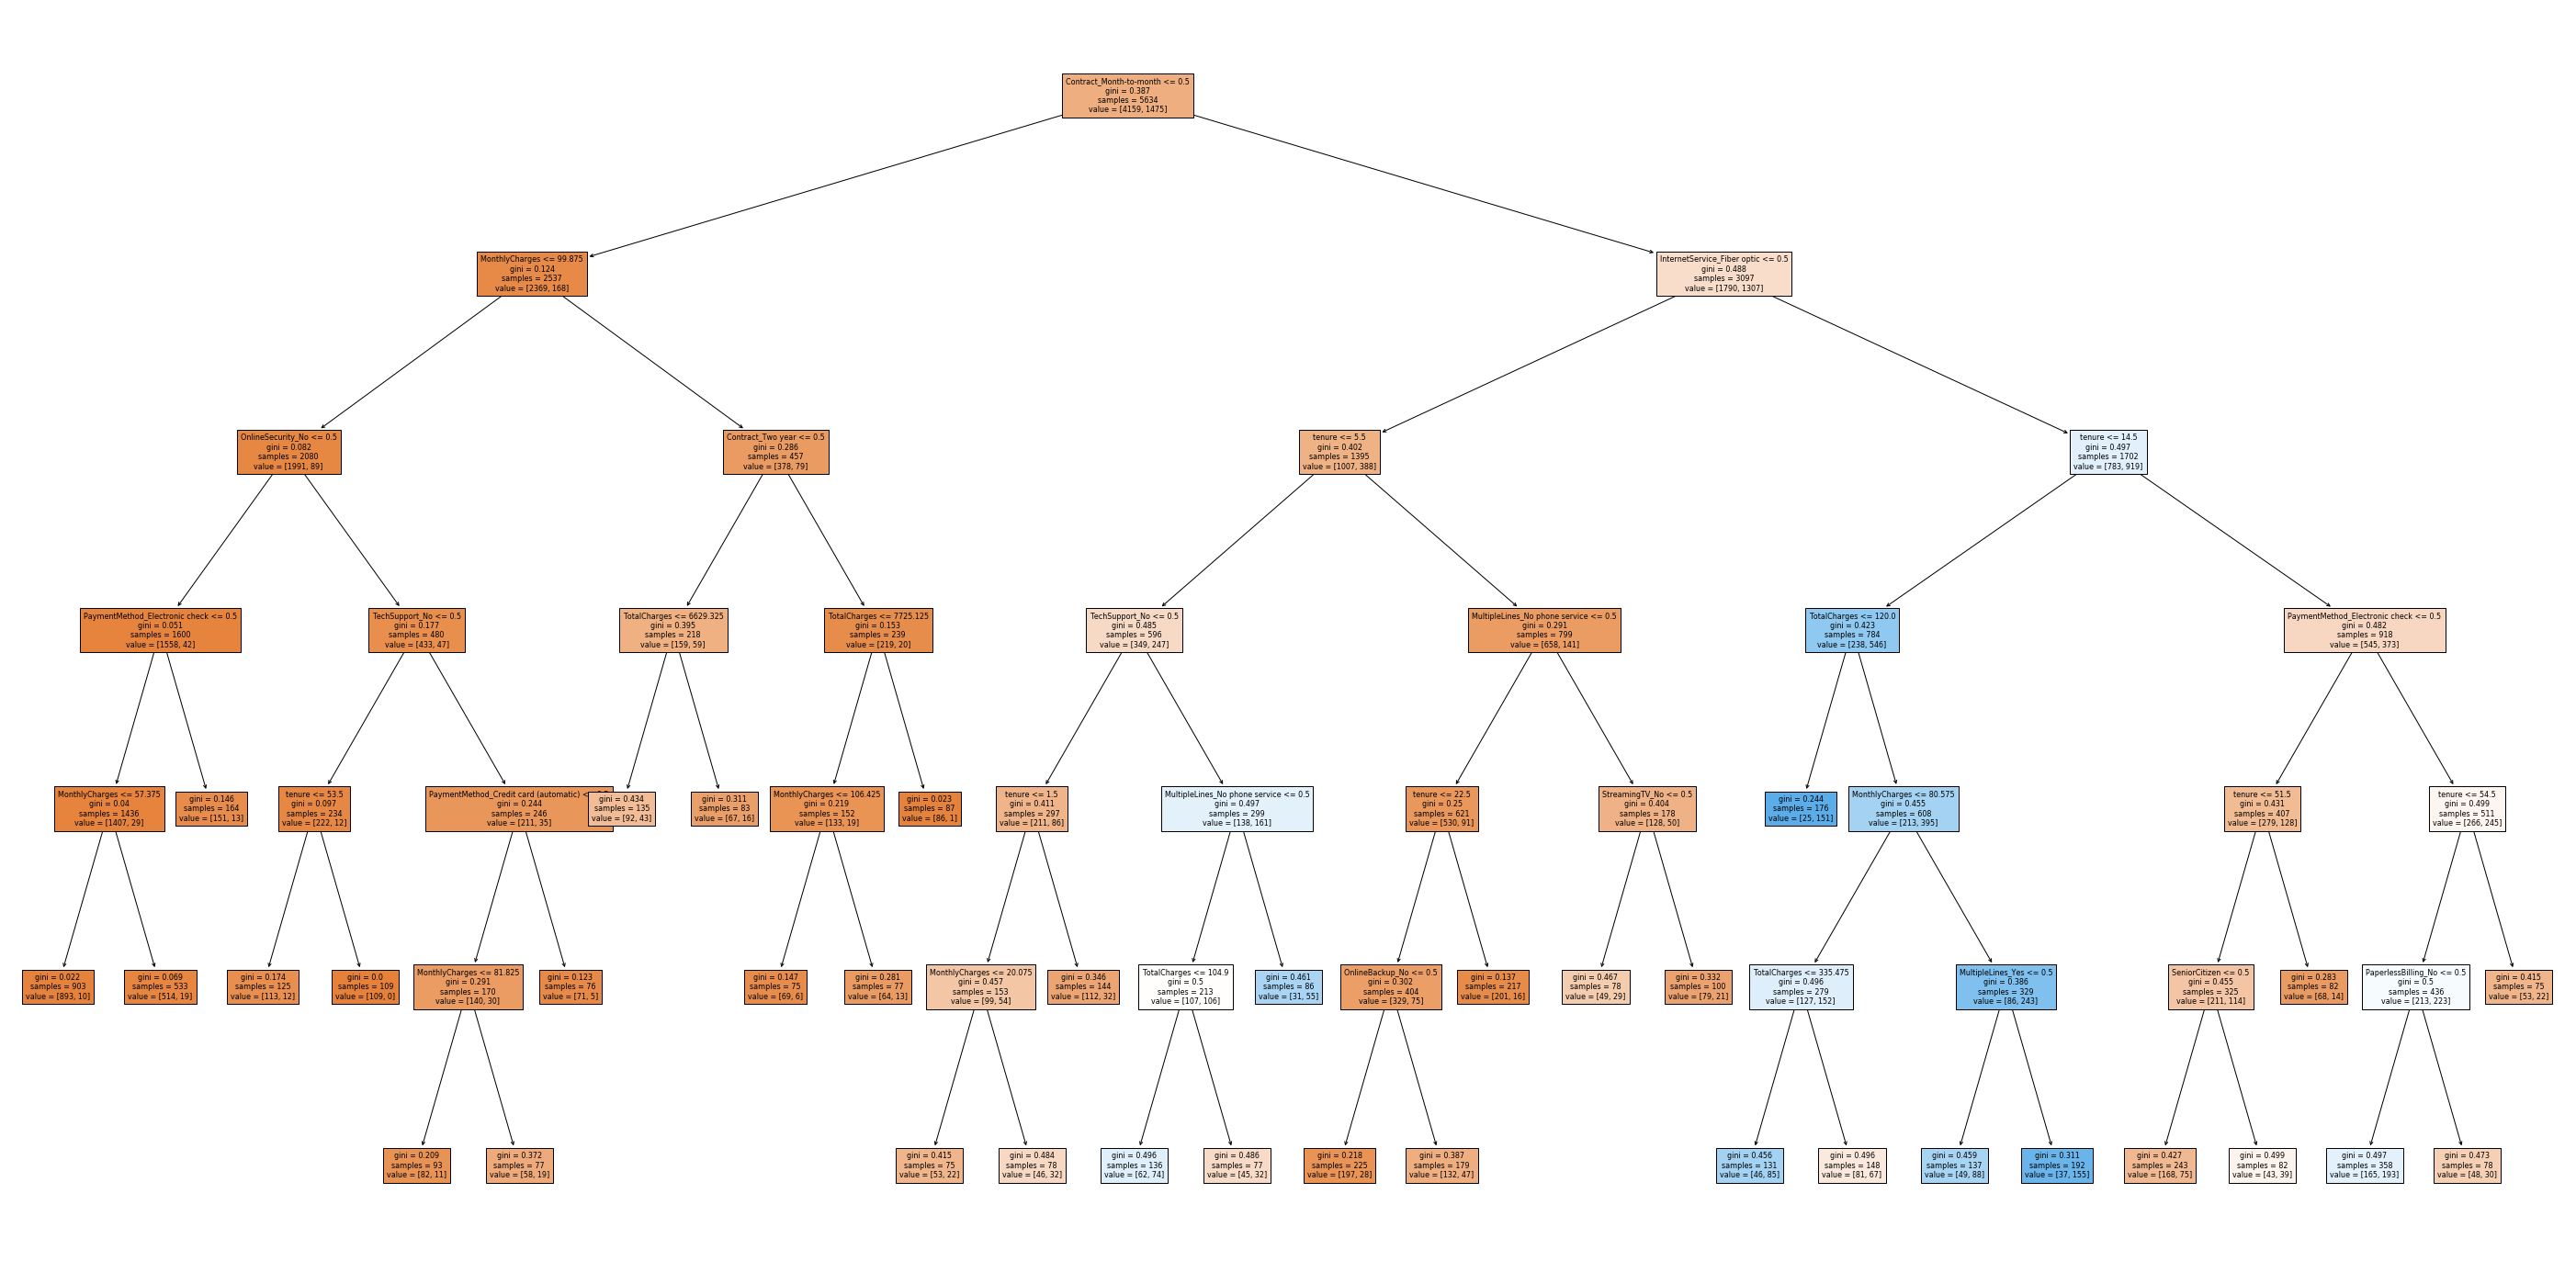

In [140]:
plt.figure(figsize=(50,25))
tree.plot_tree(dtc_GS1,feature_names=x_train.columns,filled=True,fontsize=8)

In [111]:
GridSearch2=GridSearchCV(dtc,params,cv=5,return_train_score=True,scoring='accuracy')

In [112]:
GridSearch2.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [113]:
print('The best score is ' + str(GridSearch2.best_score_))
print('The best parameter is ' + str(GridSearch2.best_params_))

The best score is 0.7976553228442509
The best parameter is {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 175}


In [143]:
dtc_GS2=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=30,min_samples_leaf=175)

In [144]:
dtc_GS2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=175, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [145]:
dtc_GS2_pred=dtc_GS2.predict(x_train)

In [146]:
confusion_matrix(y_train,dtc_GS2_pred)

array([[3659,  500],
       [ 617,  858]])

In [147]:
accuracy_score(y_train,dtc_GS2_pred)

0.8017394391196309

In [148]:
dtc_GS2_testpred=dtc_GS2.predict(x_test)

In [149]:
confusion_matrix(y_test,dtc_GS2_testpred)

array([[899, 116],
       [170, 224]])

In [150]:
accuracy_score(y_test,dtc_GS2_testpred)

0.7970191625266146

[Text(1271.9117647058824, 1245.75, 'Contract_Month-to-month <= 0.5\ngini = 0.387\nsamples = 5634\nvalue = [4159, 1475]'),
 Text(759.0441176470589, 1019.25, 'MonthlyCharges <= 99.875\ngini = 0.124\nsamples = 2537\nvalue = [2369, 168]'),
 Text(533.3823529411765, 792.75, 'OnlineSecurity_No <= 0.5\ngini = 0.082\nsamples = 2080\nvalue = [1991, 89]'),
 Text(328.2352941176471, 566.25, 'Contract_One year <= 0.5\ngini = 0.051\nsamples = 1600\nvalue = [1558, 42]'),
 Text(164.11764705882354, 339.75, 'tenure <= 70.5\ngini = 0.025\nsamples = 961\nvalue = [949, 12]'),
 Text(82.05882352941177, 113.25, 'gini = 0.032\nsamples = 727\nvalue = [715, 12]'),
 Text(246.1764705882353, 113.25, 'gini = 0.0\nsamples = 234\nvalue = [234, 0]'),
 Text(492.3529411764706, 339.75, 'MonthlyCharges <= 55.825\ngini = 0.089\nsamples = 639\nvalue = [609, 30]'),
 Text(410.29411764705884, 113.25, 'gini = 0.048\nsamples = 369\nvalue = [360, 9]'),
 Text(574.4117647058824, 113.25, 'gini = 0.143\nsamples = 270\nvalue = [249, 21]

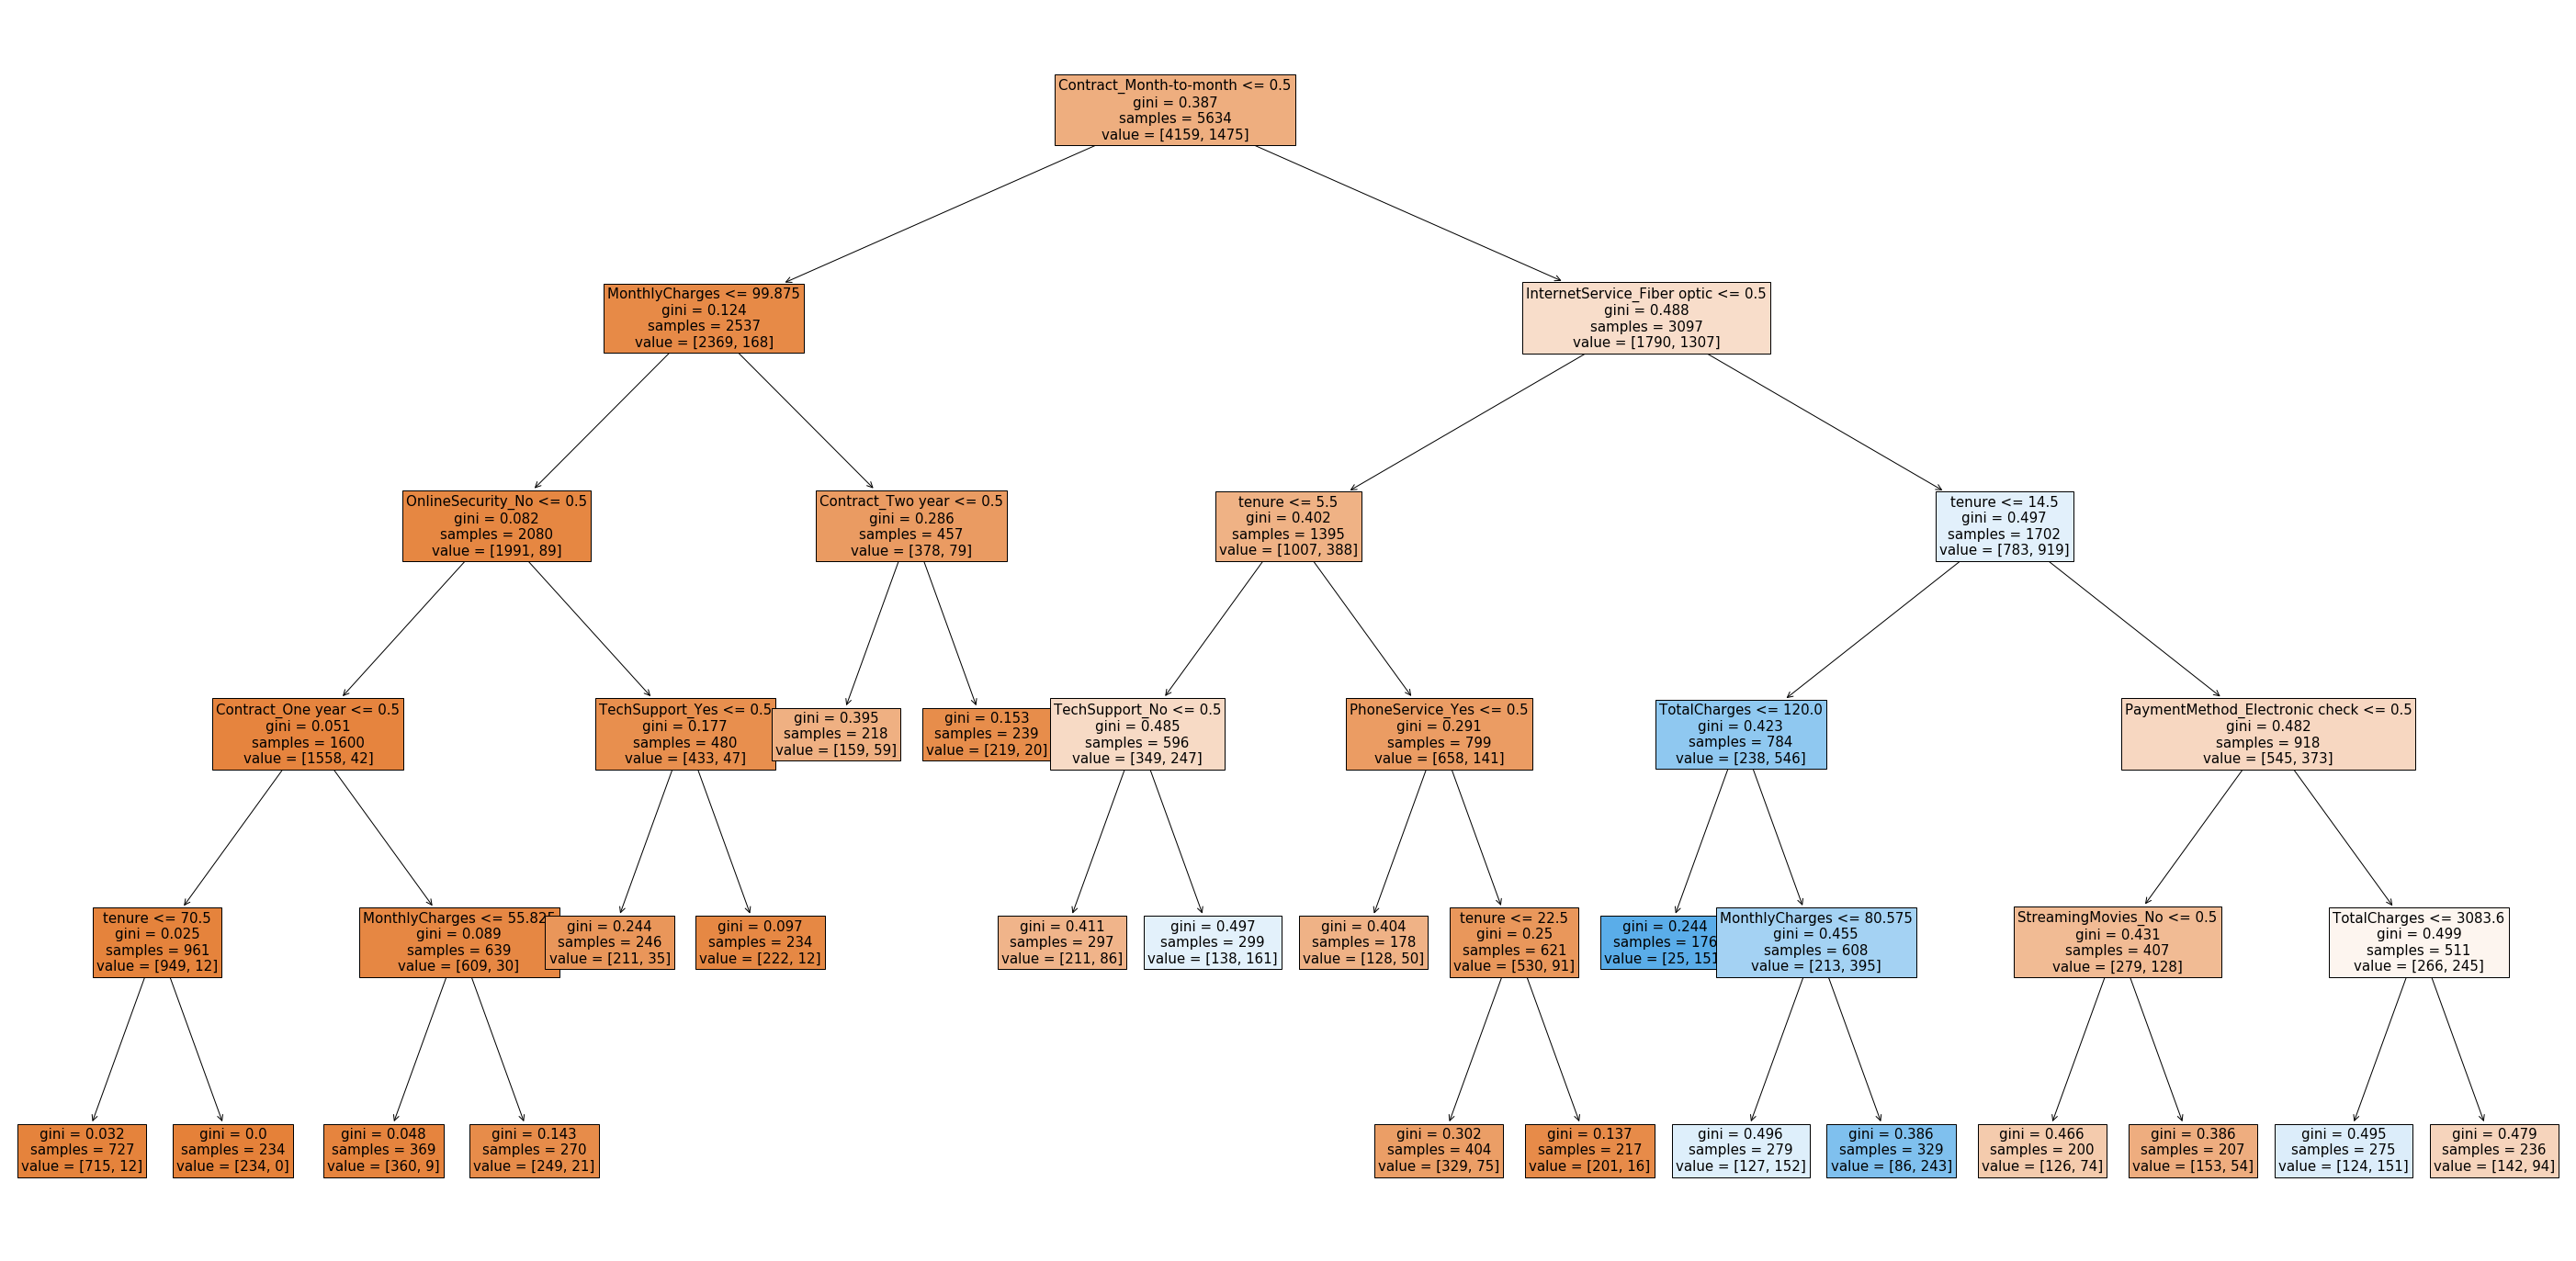

In [156]:
plt.figure(figsize=(50,25))
tree.plot_tree(dtc_GS2,filled=True,feature_names=x_train.columns,fontsize=15)

In [158]:
pd.DataFrame({'Variable':x_train.columns,
              'importances':dtc_GS2.feature_importances_}).sort_values(by=['importances'],ascending=False)[0:21]

,Variable,importances
36,Contract_Month-to-month,0.529325
1,tenure,0.170106
16,InternetService_Fiber optic,0.157561
2,MonthlyCharges,0.037341
27,TechSupport_No,0.027675
3,TotalCharges,0.026411
43,PaymentMethod_Electronic check,0.018483
38,Contract_Two year,0.011948
11,PhoneService_Yes,0.007488
18,OnlineSecurity_No,0.005686
